In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0.,100.,size = 100)
X[:,1] = 0.75*X[:,0]+3.+np.random.normal(0,10.,size = 100)

In [6]:
X[:,1].shape

(100,)

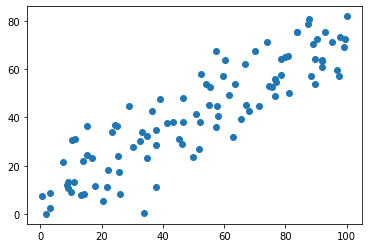

In [7]:
plt.scatter(X[:,0],X[:,1])

### demean

In [16]:
def demean(X):
    return X - np.mean(X,axis=0)

In [17]:
X_demean = demean(X)

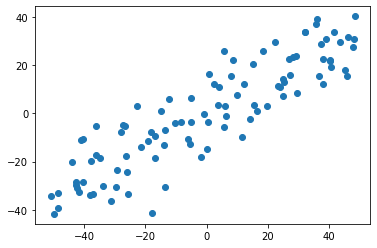

In [18]:
plt.scatter(X_demean[:,0],X_demean[:,1])

In [20]:
np.mean(X_demean[:,1])

9.237055564881303e-16

### 梯度上升法

In [21]:
def f(w,X):
    return np.sum((X.dot(w)**2))/len(X)

In [22]:
def df_math(w,X):
    return X.T.dot(X.dot(w))*2/len(X)

In [35]:
def df_debug(w,X,epsion=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsion
        w_2 = w.copy()
        w_2[i]-=epsion
        res[i] = (f(w_1,X)-f(w_2,X))/(2*epsion)
    return res

In [54]:
def direction(w):
        return w/np.linalg.norm(w)
    
def gradient_ascent(df,X,initial_w,eta, n_iters=1e4, epsilon=1e-8):
            
            w=direction(initial_w)
            cur_iter = 0

            while cur_iter<n_iters:
                gradient = df(w,X)
                last_w = w
                w = w+eta*gradient
                w=direction(w)  # 注意1:每次求一个单位向量

                if (abs(f(w,X) - f(last_w,X)) < epsilon):
                    break

                cur_iter += 1

            return w

In [55]:
initial_w =np.random.random(X.shape[1]) # 注意2：不能用0向量开始

In [56]:
initial_w

array([0.6502115 , 0.94956061])

In [57]:
eta = 0.001

In [58]:
# 注意3： 不能使用StandardScaler标准化数据

In [59]:
gradient_ascent(df_debug,X_demean,initial_w,eta)

array([0.78598551, 0.61824492])

In [60]:
w=gradient_ascent(df_math,X_demean,initial_w,eta)

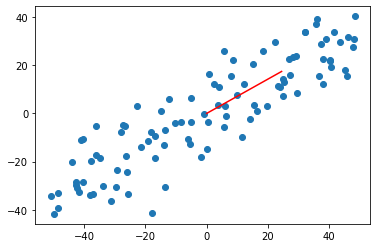

In [61]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*30],[0,w[1]*30],color='r')

### 获取前n个主成分

In [73]:
X2 = X - X.dot(w).reshape(-1,1)*w

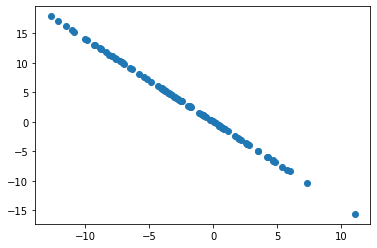

In [74]:
plt.scatter(X2[:,0],X2[:,1])

In [75]:
w2=gradient_ascent(df_math,X2,initial_w,eta)

In [76]:
w2

array([-0.57915669,  0.81521624])

In [77]:
w.dot(w2)

9.412898238636558e-11

In [80]:
def first_n_componset(n,X,eta=0.01,n_iters=1e4,epsion=1e-8):
    
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w=gradient_ascent(df_math,X_pca,initial_w,eta)
        res.append(w)
        
        X_pca=X_pca-X_pca.dot(w).reshape(-1,1)*w
        
    return res

In [81]:
first_n_componset(2,X)

[array([0.81521624, 0.57915669]), array([-0.57915669,  0.81521624])]